In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import glob

### MJO Indices

In [113]:
# read in MJO indices 
MJO_indices = pd.read_fwf('omi.1x.txt',header=None, index_col=False) 
# pre-processing MJO indices
MJO_indices_renamed = MJO_indices.rename(columns={0: "year", 1: "month", 2: "day", 3: "none", 4: "PCA1", 5:"PCA2", 6:"PCA1_PCA2"})
MJO_timeframe = MJO_indices_renamed[(MJO_indices_renamed['year'] >= 2010)].reset_index() 

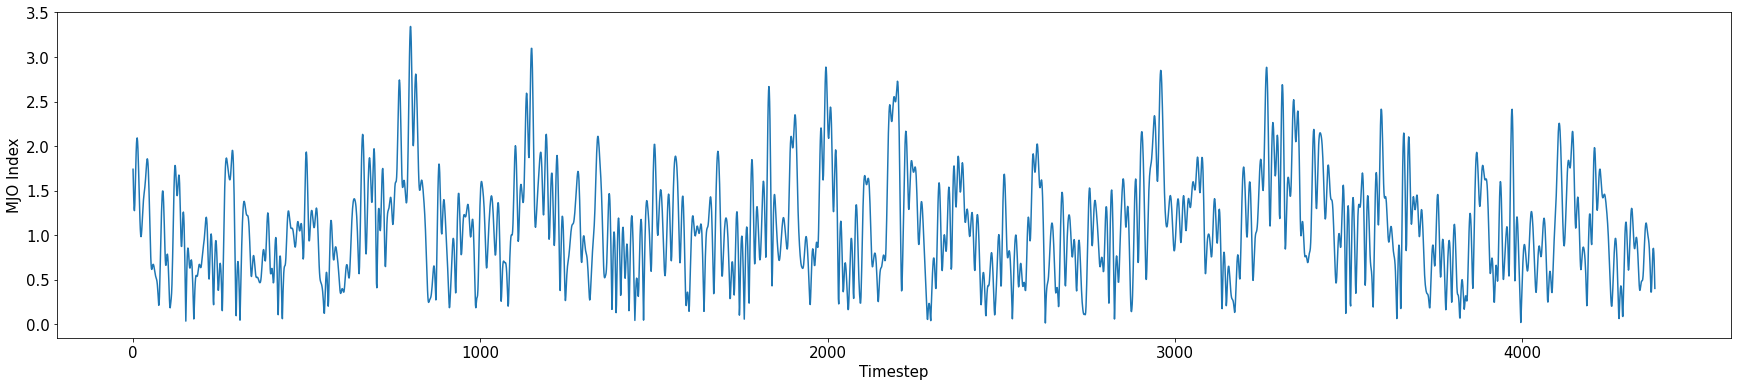

In [114]:
plt.rcParams["figure.figsize"] = (30,6)
plt.plot(np.arange(len(MJO_timeframe)),MJO_timeframe['PCA1_PCA2'])
plt.ylabel('MJO Index',fontsize=15); plt.xlabel('Timestep',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.show()

In [151]:
# Detrending # need to verify that this works
dyr = MJO_timeframe['year'] + (MJO_timeframe['month']-0.5)/12
# # Our 6 coefficient model is composed of the mean, trend, annual sine and cosine harmonics, & semi-annual sine and cosine harmonics
model = np.array([np.ones(len(dyr))] + [dyr-np.mean(dyr)] + [np.sin(2*np.pi*dyr)] + [np.cos(2*np.pi*dyr)] + [np.sin(4*np.pi*dyr)] + [np.cos(4*np.pi*dyr)])
# Take the pseudo-inverse of model to 'solve' least-squares problem
pmodel = np.linalg.pinv(model)
model_da = xr.DataArray(model.T, dims=['time','coeff'], coords={'time':MJO_timeframe['day'], 'coeff':np.arange(1,7,1)}) 
pmodel_da = xr.DataArray(pmodel.T, dims=['coeff','time'], coords={'coeff':np.arange(1,7,1), 'time':MJO_timeframe['day']})
# resulting coefficients of the model
inside = np.dot(pmodel_da, MJO_timeframe['PCA1_PCA2'])
mjo_mod = xr.DataArray(inside, dims=['coeff'], coords={'coeff':np.arange(1,7,1)})
mjo_mod.shape
# Construct mean, trend, and seasonal cycle
mean = model_da[:,0].dot(mjo_mod[0])
trend = model_da[:,1].dot(mjo_mod[1])
seas = model_da[:,2:].dot(mjo_mod[2])
# compute anomalies by removing all the model coefficients 
notrend = np.asarray(MJO_timeframe['PCA1_PCA2'])-model_da.dot(mjo_mod) #this is anomalies
detrended = notrend

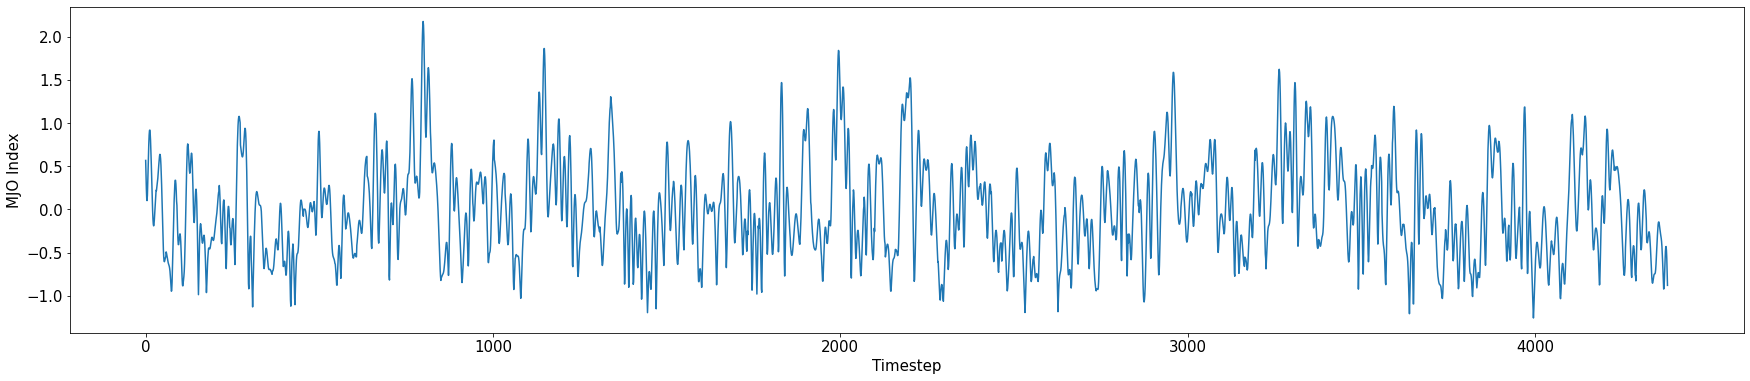

In [152]:
plt.rcParams["figure.figsize"] = (30,6)
plt.plot(np.arange(len(MJO_timeframe)),detrended)
plt.ylabel('MJO Index',fontsize=15); plt.xlabel('Timestep',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.show()

## Chlorophyll-a

In [175]:
file_in ="/Users/cassiacai/Desktop/ReDerbyData/dataset-satellite-sea-level-global-876cac7b-3d63-4408-933e-b0a5a347a11f/dt_global_twosat_phy_l4_20100104_vDT2021.nc"

In [182]:
DS=xr.open_dataset(file_in)

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
http://xarray.pydata.org/en/stable/user-guide/io.html 
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html